## Report: Analyzing the Correlation Between Temperature Changes and Food Price Inflation


### Contents:

1. Introduction
2. Methods & Data Sources
3. Loading Data and Initial Inspection
4. Results
    - How Have Temperature Changes and Food Price Inflation Varied Over the Years?
    - How Are Global Temperature Changes Correlated with Food Price Inflation?
    - Examining the Correlation Between Temperature Change and Food Price Inflation in Individual Countries
5. Conclusion
7. Limitations
6. Questions for further research

## 1. Introduction

In a world that is rapidly changing, understading the complex interactions betwen climate changes and economic factors is crucail. My data science project takes on this challenge by exploring the relationships between temperature changes and food price inflation. This project aims to develop insights that could assist policy makers in mitigating the negative impacts of climate change on food security.

I will be examining how temperature and food prices inflation have evolved over the years, both in an regional african overview and in individual african countries. One of my key focus areas is the correlation between temperature changes and food price inflation globally, and then breaking it down for each country separately. In particular, I have chosen to concentrate on 25 African countries due to their unique vulnerability to climate change. This focus is motivated by the need to understand regional variations in these correlations and provide targeted recommendations for these nations.

In this report, we explore the following key topics:

1. How Have Temperature Changes and Food Price Inflation Varied Over the Years?
2. How Are Global Temperature Changes Correlated with Food Price Inflation?
3. An Analysis of the Correlation Between Temperature Change and Food Price Inflation in Individual Countries

## 2. Methods & Data Sources


### Data-Source 1: World Bank

I've chosen the World Bank as my first data source due to their extensive data on global economic indicators. Their reputation for reliable and comprehensive data makes them an ideal source for my project.

Metadata URL 1: https://microdata.worldbank.org/index.php/catalog/4509/pdf-documentation
Data URL 1: https://microdata.worldbank.org/index.php/catalog/4509/download/65297
Data Type: CSV
Monthly food price inflation estimates by 25 Countries

This database provides monthly food price inflation estimates for the 25 African countries I'm focusing on. However, one challenging aspect was that the download link functioned only sporadically during my project work and eventually stopped working altogether. Consequently, there was no longer a possibility to download the data, meaning I had to work with extra care and precision.

In terms of data transformations, I undertook the following steps:

- Elimination of rows with zero values.
- Restriction of the data to the following columns: Inflation, Country, Months, and Year.

### Data-Source 2: FAOSTAT

For temperature data, I've turned to FAOSTAT. They are known for their extensive climate-related datasets, which are needed for a project like mine that deals with temperature changes.

Metadata URL 2: http://www.fao.org/faostat/en/#data/ET/metadata
Data URL 2: https://fenixservices.fao.org/faostat/static/bulkdownloads/Environment_Temperature_change_E_All_Data.zip
Data Type: CSV
The FAOSTAT Temperature Data

Unlike my experience with the World Bank data, I was relieved to find that the FAOSTAT link worked consistently throughout my project duration, providing uninterrupted access to the data I needed.

For the FAOSTAT data, I made the following transformations:

- Restriction to monthly data to align with the World Bank data set.
- Conversion of year data from columns into rows, a necessary step to make it compatible with the other data sets I was using.
- Transformation of year values from strings into integers to facilitate numerical analysis and comparisons.

These steps were crucial in ensuring that the FAOSTAT data could be effectively integrated with the World Bank data.

## 3. Loading Data and Initial Inspection

In this section, I'll be loading the necessary data for the analysis; if you're not technically inclined, feel free to skip this part

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [ ]:
### 3.1 Initial Inspection

In [6]:
# get data from temperature table
temp_df = pd.read_sql_table('temperature', 'sqlite:///../data/zylesto.sqlite')
# print first 5 rows of the table
temp_df.head()

,Area Code,Area Code (M49),Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1961F,...,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F,Y2021,Y2021F,Y2022,Y2022F
0,2,'004,Afghanistan,7001,January,7271,Temperature change,°c,0.756,E,...,2.051,E,2.858,E,-0.681,E,0.559,E,2.284,E
1,2,'004,Afghanistan,7001,January,6078,Standard Deviation,°c,1.964,E,...,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E
2,2,'004,Afghanistan,7002,February,7271,Temperature change,°c,-1.766,E,...,2.714,E,0.067,E,2.500,E,4.086,E,2.371,E
3,2,'004,Afghanistan,7002,February,6078,Standard Deviation,°c,2.602,E,...,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E
4,2,'004,Afghanistan,7003,March,7271,Temperature change,°c,0.458,E,...,4.533,E,0.293,E,0.555,E,2.480,E,3.598,E


In [5]:
# get data from food_price_inflation table
food_df = pd.read_sql_table('food_price_inflation', 'sqlite:///zylesto.sqlite')
# print first 5 rows of the table
food_df.head()

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-02-01
2,0.54,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.56,0.57,NaN,Afghanistan,AFG,2007-05-01


In [6]:
# display the summary information of the DataFrame
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4798 entries, 0 to 4797
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4734 non-null   float64
 1   High       4734 non-null   float64
 2   Low        4734 non-null   float64
 3   Close      4734 non-null   float64
 4   Inflation  4434 non-null   float64
 5   country    4798 non-null   object 
 6   ISO3       4798 non-null   object 
 7   date       4798 non-null   object 
dtypes: float64(5), object(3)
memory usage: 300.0+ KB


In [18]:
df = pd.merge(temp_df, food_df,  how='inner', on=['Area','Months','Year'])
df

,Area,Months,Year,Change,Inflation
0,Afghanistan,January,2008,-5.684,40.89
1,Afghanistan,February,2008,-2.306,44.69
2,Afghanistan,March,2008,4.324,53.97
3,Afghanistan,April,2008,1.369,67.56
4,Afghanistan,May,2008,3.045,78.17
...,...,...,...,...,...
2656,Syrian Arab Republic,August,2022,2.026,60.79
2657,Syrian Arab Republic,September,2022,2.612,57.48
2658,Syrian Arab Republic,October,2022,2.465,60.53
2659,Syrian Arab Republic,November,2022,1.730,63.40


## 4. Results

### Question 1: How Have Temperature Changes and Food Price Inflation Varied Over the Years?

To address this question, I use two types of visualizations. Firstly, I use line plots to simultaneously represent both inflation and temperature change. These plots feature the years on the x-axis and the target variables (inflation and temperature change) on the y-axis. The line in each plot indicates the average (mean) value for each year, while the shaded area around the line represents the range of variability (upper and lower bounds) for each year, offering insights into yearly fluctuations.

Secondly, I utilize histograms to delve deeper into the distribution of temperature changes and inflation values. These histograms provide a visual representation of the frequency distribution, helping to identify common ranges, outliers, and general patterns in temperature changes and inflation. This approach allows for a comprehensive understanding of how these two crucial factors have evolved over time, highlighting any significant trends or anomalies in the data.

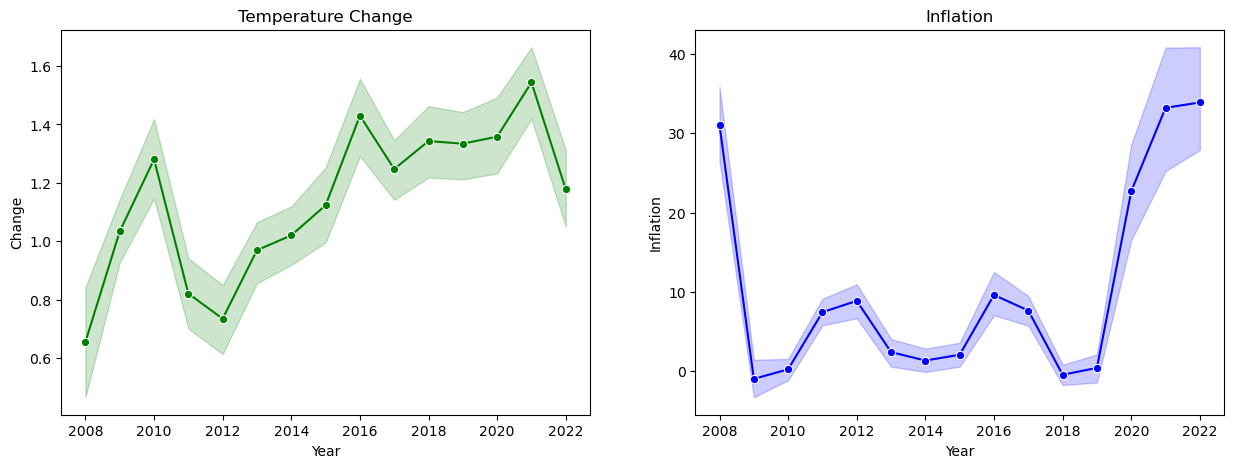

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=df, x='Year', y='Change', ax=ax1, marker='o', color='g')
ax1.set_title('Temperature Change')
sns.lineplot(data=df, x='Year', y='Inflation', ax=ax2, marker='o', color='b')
ax2.set_title('Inflation')
plt.show()

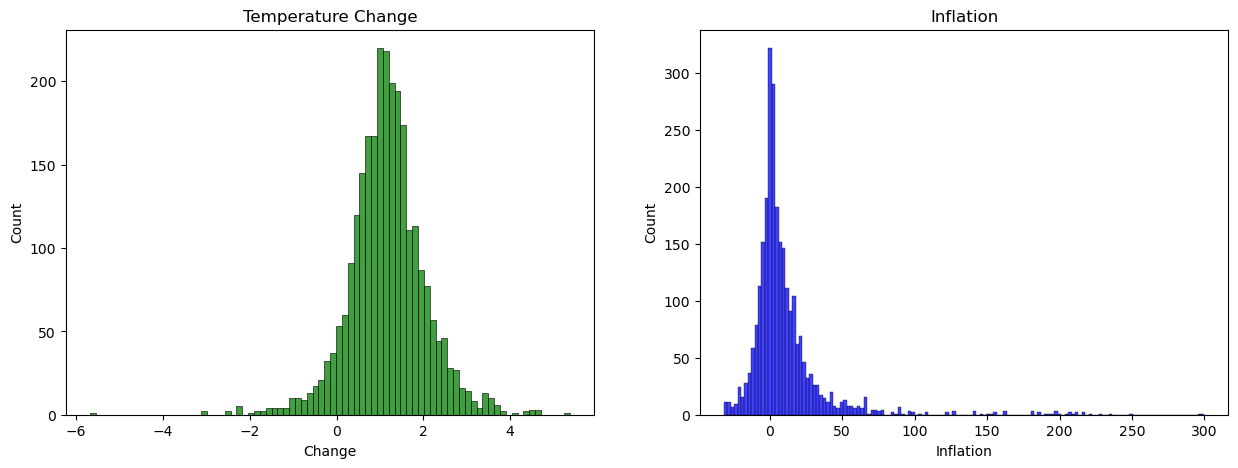

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=df, x='Change', ax=ax1, color='g')
ax1.set_title('Temperature Change')
sns.histplot(data=df, x='Inflation', color='b')
ax2.set_title('Inflation')
plt.show()

### Inference For Question 1:

Based on the analysis from the graphs, here are some key observations:

1. There's been a noticeable decrease in temperature over the recent years. This trend needs further investigation to understand the underlying factors.
2. Inflation has shown an upward trend in the same period. This could be linked to various economic factors including market dynamics, global events, and policy changes.
3. The typical range of temperature change appears to be between 1-2.5 degrees Celsius. Interestingly, the lowest recorded temperature change dipped to around -6 degrees, suggesting some extreme weather occurrences.
4. Inflation rates typically hover around 10-20%, but there have been instances where the inflation skyrocketed to as high as 300%. This indicates periods of severe economic instability or extraordinary market conditions.

### Question 2: How Are Global Temperature Changes Correlated with Food Price Inflation?

To anwser this question, I utilize a heatmap along with Pearson's r correlation coefficient to assess the correlation between variables. The Pearson's r correlation coefficient is a statistical measure that ranges from -1 to +1. A value of -1 indicates a perfect negative correlation, implying that as one variable increases, the other decreases with equal intensity. Conversely, a value of +1 signifies a perfect positive correlation, where an increase in one variable corresponds to an increase in the other. Coefficient values closer to 0 suggest little to no correlation between the variables. This method helps in identifying any significant relationships between temperature changes and food price inflation on a global scale.

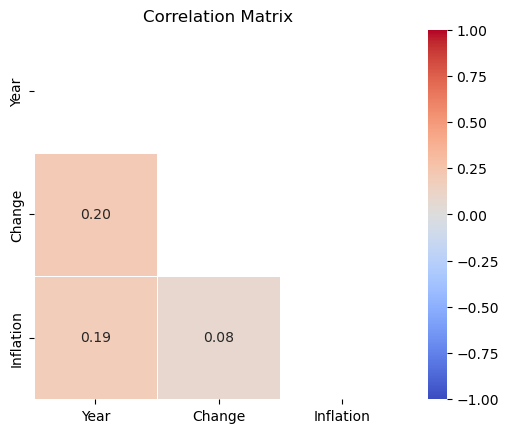

In [21]:
# compute the correlation matrix
corr = df.corr()
# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm',
           mask=mask, square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Inference for Question 2:

From the analysis conducted using the heatmap and Pearson's r correlation coefficient, the following observations can be made:

1. When looking at the data collectively for all countries, there appears to be no significant correlation between temperature change and food price inflation. This suggests that, on an continental scale, other factors might be influencing food prices beyond just temperature changes.

2. Similarly, the year does not exhibit a notable correlation with either temperature change or food price inflation. This indicates that year-to-year variations in temperature and inflation do not have a predictable or consistent relationship.

### Question 3: Examining the Correlation Between Temperature Change and Food Price Inflation in Individual Countries

To delve into the specifics of how temperature changes correlate with food price inflation on a country-by-country basis, I'll segment the dataset by each country included in our study. For each country, I plan to utilize both line plots and Pearson's r correlation coefficient. This approach will allow us to explore whether there is a notable correlation between temperature changes and food price inflation within individual countries. This detailed analysis is key to understanding if certain countries exhibit unique patterns or trends that differ from the global overview.

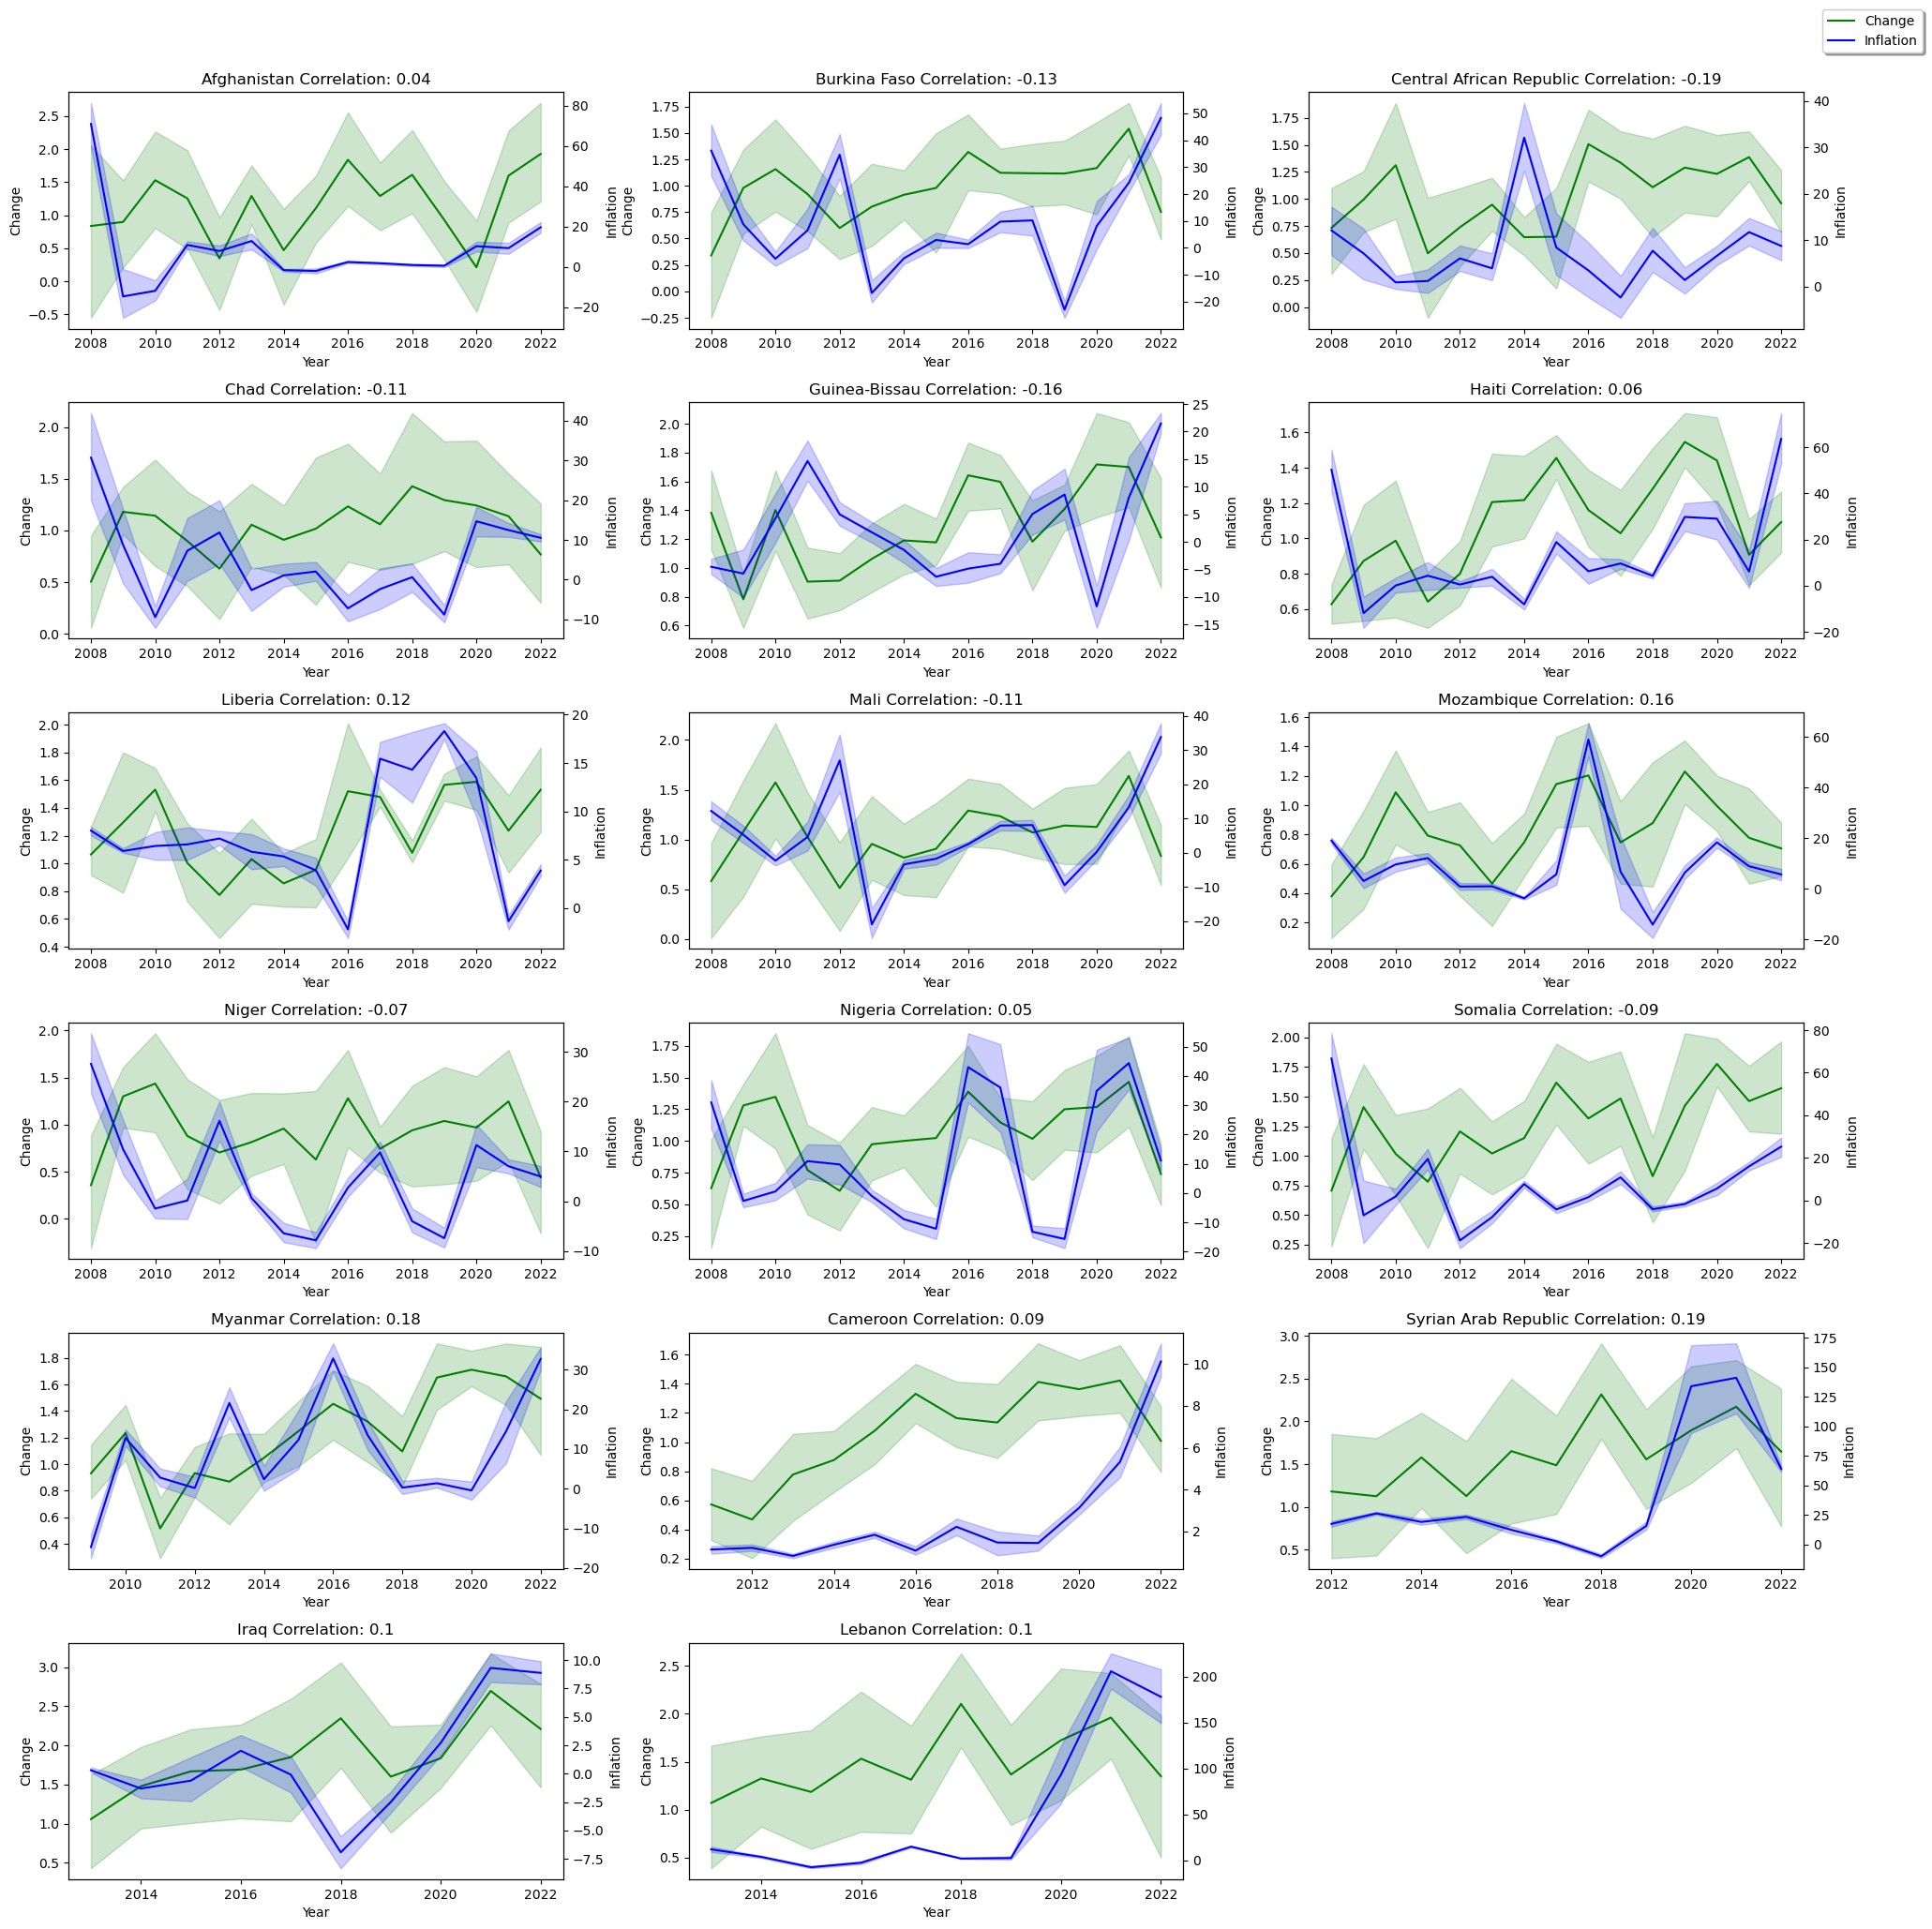

In [22]:
fig, axs = plt.subplots(6, 3, figsize=(20, 20))
axs = axs.reshape(-1)
for area, ax in zip(df['Area'].unique(), axs):
    sub = df[df['Area'] == area]
    ax = sns.lineplot(data=sub, x='Year', y='Change', ax=ax, label='Change', color='g', legend=False)
    ax2 = ax.twinx()

    sns.lineplot(data=sub, x='Year', y='Inflation', ax=ax2, label='Inflation', color='b', legend=False)
    corr = round(sub['Change'].corr(sub['Inflation']), 2)
    ax.set_title(f'{area} Correlation: {corr}')

fig.delaxes(axs[-1])
line = Line2D([0], [0], label='Change', color='g')
line2 = Line2D([0], [0], label='Inflation', color='b')

handles = [line, line2]

fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(1, 1.03),
          fancybox=True, shadow=True)
fig.tight_layout()


### Inference for Question 3:

Based on the analysis of each country's data using line plots and Pearson's r correlation coefficient, the following inference can be drawn:

- Across the board, there seems to be no significant correlation between temperature change and food price inflation for any of the countries in the dataset. This lack of correlation suggests that other factors might be more influential in determining food prices inflation in these countries.

## Conclusion

This analysis has shed light on the relationship between temperature changes and food price inflation in the context of 25 African countries. The key insights from this study are as follows:

1. **Regional Overview:** In the context of these 25 African countries, there appears to be no significant correlation between temperature changes and food price inflation. This suggests that in this region, other factors may have a more pronounced impact on food price inflation than temperature changes alone.

2. **Year-to-Year Variations:** The investigation also revealed a lack of consistent correlation between year-to-year temperature changes and inflation. This finding indicates that annual variations in food prices and temperature are not necessarily interconnected and may be influenced by a variety of other factors.

3. **Country-Specific Analysis:** Further breaking down the data by individual countries within this African region, the trend continues with no significant correlation observed between temperature changes and food price inflation in any specific country. This supports the view that other factors might be more influential in determining food price inflation than temperature changes.

These findings underscore the complexity of food markets in the African region and their vulnerability to a broad spectrum of factors. The lack of a strong correlation between temperature changes and food price inflation, while personally disappointing as it contradicts an initial hypothesis, is a reminder of nature of scientific research. This outcome stresses the importance of considering a wide range of elements when tackling issues related to food price stability and economic resilience in African countries.

## 6. Limitations of the Study

While conducting this study, several limitations were encountered that could have impacted the findings:

- **Missing Data in Temperature Dataset:** There were a few missing values in the temperature change dataset. While these gaps were not extensive, they could potentially influence the accuracy of the correlation analysis.

- **Limited Geographic Scope for Food Prices Data:** The food prices dataset was confined to only 25 African countries. The absence of data from major economies like the U.S. and European countries restricts the scope of our analysis. Expanding this dataset to include more countries would have provided a more comprehensive understanding of the global correlation between food prices and temperature change.

- **Potential Confounding Variables:** The study primarily focused on the direct correlation between temperature changes and food price inflation without extensively exploring other possible influencing factors like socio-economic policies, regional conflicts, and global market dynamics. These variables could play a significant role in food prices and might confound the relationship with temperature changes.

Additionally, it's important to note a potential limitation that did not impact my study: the unavailability of downloadable data from the World Bank during the project. Fortunately, this did not pose a challenge as the necessary data had been downloaded locally at the project's onset.

These limitations highlight areas for future research and the need for more comprehensive data collection to deepen our understanding of these complex dynamics.

## 7. Questions for Further Research

While this research has provided valuable insights, it also opens up several areas for further exploration. The following questions remain unanswered and could be the focus of future studies:

- **Exploring Additional Influencing Factors:** What other variables and factors could be investigated to find correlations with food price inflation? This could include socio-economic policies, supply chain dynamics, regional conflicts, or global market trends.

- **Expanding Geographic Scope:** Is it possible to obtain food price inflation data for other countries, particularly major economies such as the U.S., European countries, and emerging markets in Asia and Latin America? Incorporating data from these countries could offer a more comprehensive global perspective and enable a more nuanced understanding of the interplay between food prices and various global factors.

- **Impact of Climate Change Policies:** How do climate change policies and initiatives impact food price inflation in different regions? This could involve studying the effect of environmental regulations, green energy adoption, and sustainability practices on the agricultural sector and food markets.

These questions could guide future research efforts, deepening our understanding of the complex factors that influence food price inflation and how they interact with environmental changes.